In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib import rcParams
rcParams['mathtext.default'] = 'regular'

# import glob

# from Bio import SeqIO
# import matplotlib as mpl

# from matplotlib.pyplot import figure
# from matplotlib.pyplot import subplots_adjust
# import matplotlib.ticker as mticks
# 
# from matplotlib import rcParams

#### Load data

In [141]:
cp_genomes = pd.read_csv('../data/chloroplastGenomeSizes.csv')
cp_cy_data = pd.read_csv('../data/greenChloroplastVsProteome.csv')

In [64]:
cp_groups = list(set(cp_genomes['Updated_group'].to_list()))
# print(cp_groups)
group_size = {}
for group in cp_groups:
    group_size[group] = (len(cp_genomes[cp_genomes['Updated_group'] == group]))
    
print(group_size)

{'Streptophyta': 1783, 'Haptophyta': 4, 'Chlorophyta': 68, 'SAR': 28, 'Euglenozoa': 7, 'Cryptophyceae': 2, 'Rhodophyta': 21}


#### Plot functions

In [223]:
# Chloroplast genomes
def plot_cp_genomes(ax):
    groups_in_order      = ['Euglenozoa', 'SAR', 'Haptophyta', 'Cryptophyceae', 'Rhodophyta', 'Chlorophyta', 'Streptophyta']    
    groups_in_order_neat = ['Euglenozoa\n$\it{N}$ = 7',
                            'Sar\n$\it{N}$ = 28', 
                            'Haptophyta\n$\it{N}$ = 4',
                            'Cryptophyceae\n$\it{N}$ = 2',
                            'Rhodophyta\n$\it{N}$ = 21', 
                            'Chlorophyta\n$\it{N}$ = 68',
                            'Streptophyta\n$\it{N}$ = 1783']
    
    
    cp_genome_boxplt = sns.boxplot(x='Updated_group', y='N_CDS', data=cp_genomes, ax=ax, 
                                   palette=['#CAE4C5','#CAE4C5','#CAE4C5','#CAE4C5','#2F7D49','#2F7D49','#2F7D49'],
                                   order=groups_in_order, linewidth=1.3, showfliers = False)
    
#     cp_genome_boxplt.set_xticklabels(groups_in_order_neat, ha='left', rotation=45)
    cp_genome_boxplt.set_xticklabels(groups_in_order_neat)
    
    ax.set_xlabel('')
    ax.set_ylabel('Number of coding sequences')
    ax.set(ylim=(0, 250))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


In [224]:
# genome vs proteome size
def plot_genome_vs_proteome(ax):
    boxplt = sns.boxplot(x='Group', y='N_CDS', data=cp_cy_data, ax=ax, linewidth=1.3, showfliers = False,
                        order=['cyanobacteria', 'cp_genome', 'cp_proteome'], palette=['#BBBBBB'])
    ax.set_xlabel('')
    ax.set_ylabel('Number of coding sequences')
    boxplt.set_xticklabels(['cyanobacteria', 'chloroplast\ngenome', 'nuclear-encoded\nchloroplast\nproteome'])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


### Make plot

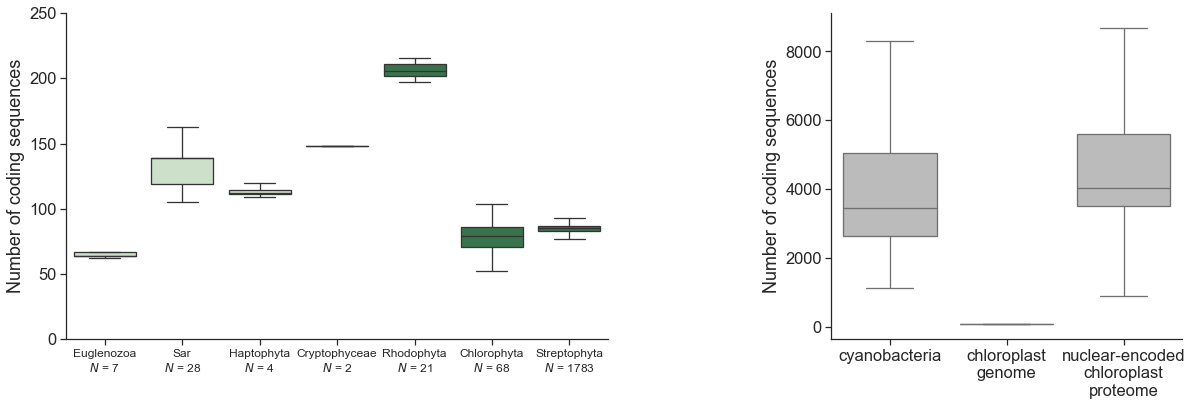

In [231]:
fig_variables = { "legend_font_size": 10, "y_label_font_size": 14, "x_label_font_size": 14, "x_tick_font_size": 14,
                  "y_tick_font_size": 12, "arabidopsis_x_tick_font_size": 12, "title_size": 14, "figsize": (20,6), "left": 0.125, 
                  "bottom": 0.1, "right": 0.9, "top": 0.9, "wspace": 0.2, "hspace": 0.60}

fig = plt.figure(constrained_layout=False, figsize=fig_variables['figsize'])
spec = gridspec.GridSpec(ncols=6, nrows=1, figure=fig)

sns.set(font_scale = 1.5, font='Arial')
sns.set_style(style='ticks')

ax1 = fig.add_subplot(spec[0,0:3])
plot_cp_genomes(ax1)
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
ax2 = fig.add_subplot(spec[0,4:6])
plot_genome_vs_proteome(ax2)


# plt.savefig("../figures/cp_genome_size.pdf", transparent=True, dpi=300, bbox_inches='tight')


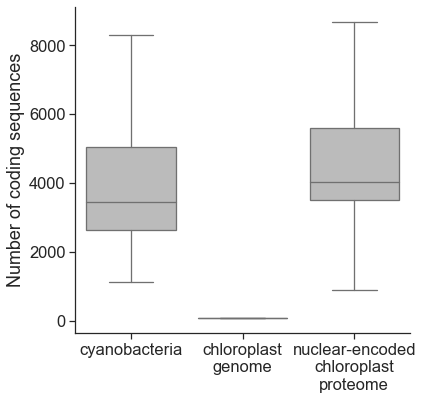

In [188]:
fig_variables = { "legend_font_size": 10, "y_label_font_size": 14, "x_label_font_size": 14, "x_tick_font_size": 14,
                  "y_tick_font_size": 12, "arabidopsis_x_tick_font_size": 12, "title_size": 14, "figsize": (6,6), "left": 0.125, 
                  "bottom": 0.1, "right": 0.9, "top": 0.9, "wspace": 0.2, "hspace": 0.60}

fig = plt.figure(constrained_layout=False, figsize=fig_variables['figsize'])
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)

sns.set(font_scale = 1.5, font='Arial')
sns.set_style(style='ticks')

ax1 = fig.add_subplot(spec[0,0:3])
plot_genome_vs_proteome(ax1)
# plt.savefig("../figures/genome_vs_proteome_size.pdf", transparent=True, dpi=300, bbox_inches='tight')
